<a href="https://colab.research.google.com/github/JulieCarpenter/Convolutional-Neural-Network/blob/main/03_03_Start_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

## Import packages

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.utils import to_categorical

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Load the data

#### Load the data into train and test 

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Verify. 

In [5]:
print(X_train.shape) # Expecting 60,000 records of size 28 x 28
print(y_train.shape) # Expecting 60,000 records
print(X_test.shape)  # Expecting 10,000 records of size 28 x 28
print(y_test.shape)  # Expecting 10,000 records

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [6]:
X_train[0].shape  # Expecting 28 x 28 as above

(28, 28)

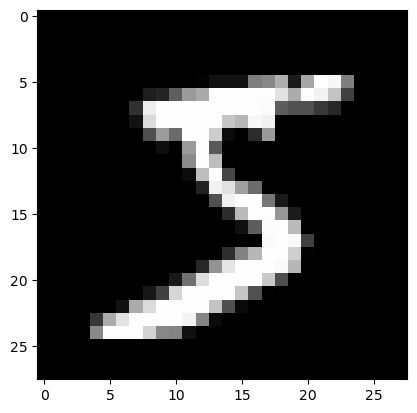

In [7]:
plt.imshow(X_train[0], cmap="grey");

In [8]:
y_train[0] # Expecting 5

5

## Preprocessing the image data

In [9]:
image_height, image_width = 28, 28  # Set height and width variables for preprocessing all images

In [10]:
X_train = X_train.reshape(60000, image_height*image_width) # Reformat from 28x28 to single layer (784 pixles(neurons))
print(X_train.shape)

(60000, 784)


In [11]:
X_test = X_test.reshape(10000, image_height*image_width)
print(X_test.shape)

(10000, 784)


In [12]:
print(X_train[0])  # Verify greyscale (0-255)
X_train = X_train.astype('float32')
print(X_test[0])  # Verify greyscale (0-255)
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [13]:
X_train /= 255.0  # Transform values from 0-255 to 0-1
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
print(y_train.shape) # Verify one dimentional 
print(y_test.shape)

(60000,)
(10000,)


In [15]:
y_train = to_categorical(y_train, 10) # Classify 10 digits to 10 bins
print(y_train.shape)


(60000, 10)


In [16]:
y_test = to_categorical(y_test, 10) # Classify 10 digits to 10 bins
print(y_test.shape)

(10000, 10)


## Build a model

## Compile the model

## Train the model

## What is the accuracy of the model?

### Plot the accuracy of the training model

### Plot the accuracy of training and validation set

### Accuracy of training and validation with loss

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [47]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [50]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

NameError: name 'num_classes' is not defined

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()